# BIGMART SALES PREDICTION

### Table of Contents :  
  
General Details
Hypothesis  
Loading libraries 
EDA  
Dealing with null values
Univariate   
Outliers
Graphs
Running the model
One Hot Encoding  
Linear Regression  
RandomForest  
XGBoost  
Decision Tree


### General Details: 

The dataset 8523 contains datapoints (rows) and 12 features (columns).

The dataset is for 1559 items in 10 different stores.

There are present categorical (object) and numerical features (float, int).

The target is the _'Item_OutletSales' feature.

### Hypothesis:
It can generated based on various factors:
1. Item fat content:  
  Sales of item with low fat is higher.  
  Sales is irrespective of fat content
  
2. Item MRP:
   People buy cheap products more  
   People buy expensive products, because they might be of good quality  
   
3. Outlet type:
    Large stores have more sales as they have good image on people  
    Small stores have high sales because of affordability  
    
4. Outlet Establishment year:  
    Stores that have been in market for a long period have high sales, because of loyalty  
    New stores are more trending, which increases sales

## Loading libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
pip install plotly_express


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
import plotly_express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [58]:
test = pd.read_csv(r"C:\Users\GOKUL\Downloads\9961_14084_bundle_archive\Test.csv")
train = pd.read_csv(r"C:\Users\GOKUL\Downloads\9961_14084_bundle_archive\Train.csv")

# EDA

In [59]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
train.shape

(8523, 12)

In [61]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [63]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [64]:
test.shape

(5681, 11)

In [65]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [66]:
## DEALING WITH NULL VALUES

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [67]:
median1=train["Item_Weight"].median()
train["Item_Weight"].replace(np.nan,median1,inplace=True)

In [68]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [69]:
mode1=test["Outlet_Size"].mode().values[0]
test["Outlet_Size"] = test["Outlet_Size"].replace(np.nan,mode1)

In [70]:
test.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [71]:
## INCONSISTENT DATA ENTRIES

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [72]:
print('Modified Categories:')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(train['Item_Fat_Content'].value_counts())

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [79]:
train['Outlet_Size'] = train.Outlet_Size.map({'Small':0,'Medium':1,'High':2})
test['Outlet_Size'] = test.Outlet_Size.map({'Small':0,'Medium':1,'High':2})

In [80]:
print("Item Weight",train['Item_Weight'][20:30])
print("Outlet Size",train['Outlet_Size'][20:30])

Item Weight 20    18.850
21    12.600
22    14.600
23    12.600
24    13.850
25    13.000
26     7.645
27    11.650
28     5.925
29    12.600
Name: Item_Weight, dtype: float64
Outlet Size 20    2.0
21    1.0
22    0.0
23    0.0
24    0.0
25    NaN
26    0.0
27    2.0
28    NaN
29    0.0
Name: Outlet_Size, dtype: float64


<AxesSubplot:>

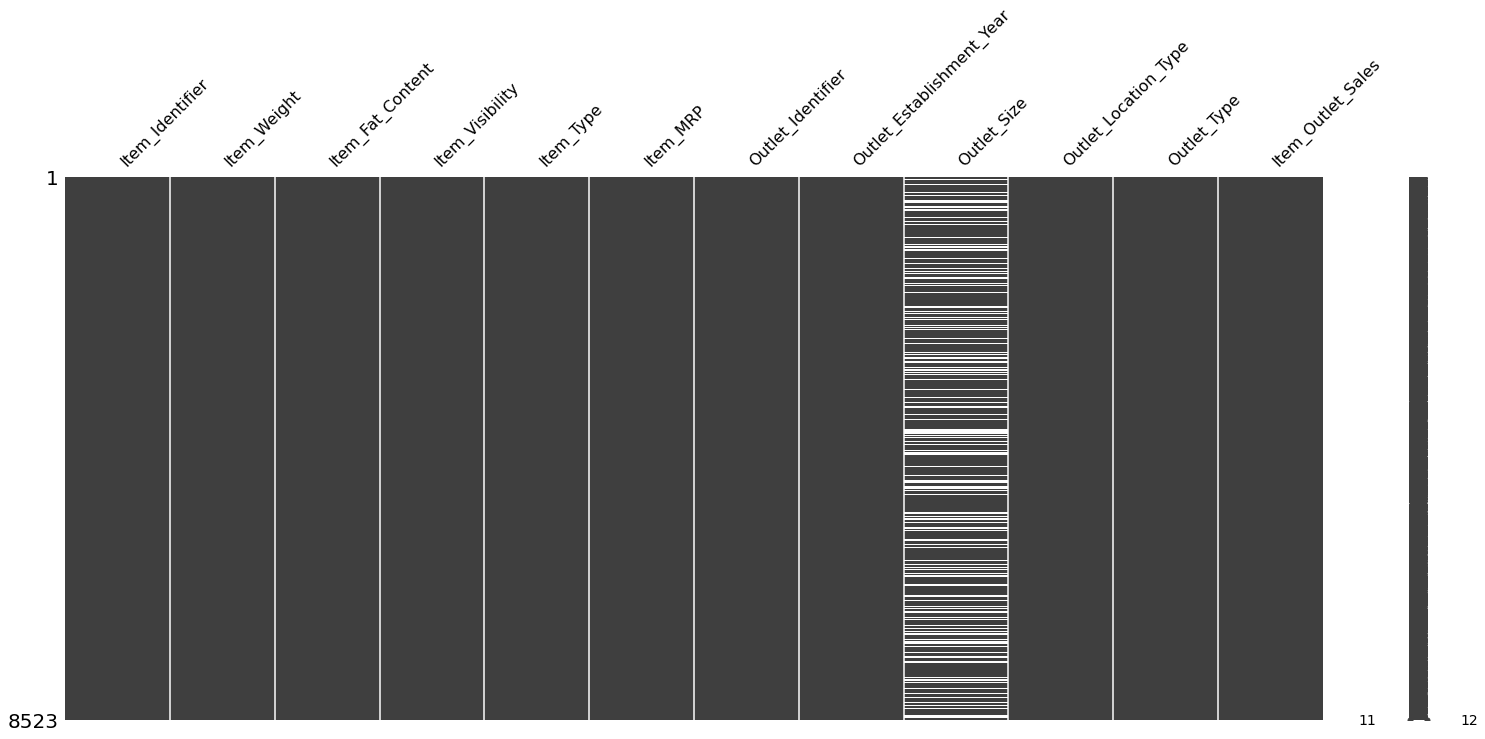

In [81]:
import missingno as mno

mno.matrix(train)

### Univariate

C:\Users\GOKUL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

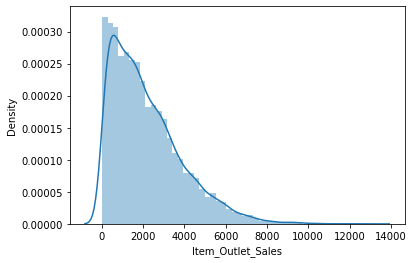

In [74]:
sns.distplot(train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

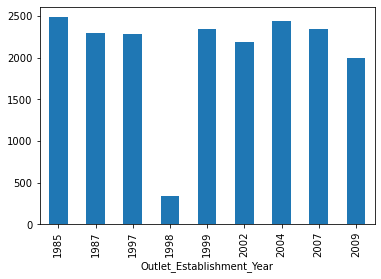

In [75]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [82]:
imputer = KNNImputer(n_neighbors=2)
train['Outlet_Size'] = imputer.fit_transform(train[['Outlet_Size']])
train['Item_Weight'] = imputer.fit_transform(train[['Item_Weight']])
test['Outlet_Size'] = imputer.fit_transform(test[['Outlet_Size']])
test['Item_Weight'] = imputer.fit_transform(test[['Item_Weight']])
train['Outlet_Size'] = round(train['Outlet_Size'],0)
test['Outlet_Size'] = round(test['Outlet_Size'],0)

In [83]:
print("Item Weight",train['Item_Weight'][20:30])
print("Outlet Size",train['Outlet_Size'][20:30])

Item Weight 20    18.850
21    12.600
22    14.600
23    12.600
24    13.850
25    13.000
26     7.645
27    11.650
28     5.925
29    12.600
Name: Item_Weight, dtype: float64
Outlet Size 20    2.0
21    1.0
22    0.0
23    0.0
24    0.0
25    1.0
26    0.0
27    2.0
28    1.0
29    0.0
Name: Outlet_Size, dtype: float64


In [88]:
## OUTLIERS 

px.box(train,x='Item_Type',y='Item_Outlet_Sales')

In [89]:
px.box(train,x='Outlet_Identifier',y='Item_Outlet_Sales')

In [90]:
train['Outlet_Size'].value_counts()

1.0    5203
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

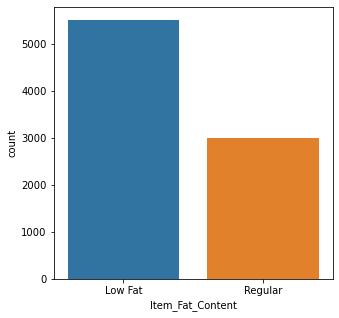

In [92]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=train)
plt.show()

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

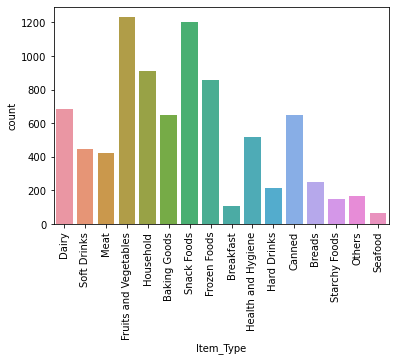

In [94]:
labels = list(train['Item_Type'].unique())
chart = sns.countplot(x=train['Item_Type'])
chart.set_xticklabels(labels=labels, rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

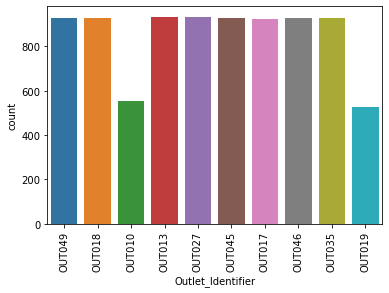

In [95]:
## Outlet identifier because we nned to find out that particular outlet

labels = list(train['Outlet_Identifier'].unique())
chart = sns.countplot(x=train['Outlet_Identifier'])
chart.set_xticklabels(labels=labels, rotation=90)

C:\Users\GOKUL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



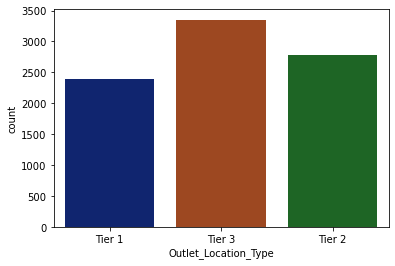

In [96]:
sns.countplot(train["Outlet_Location_Type"],palette = 'dark')
plt.show()

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Outlet_Size'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

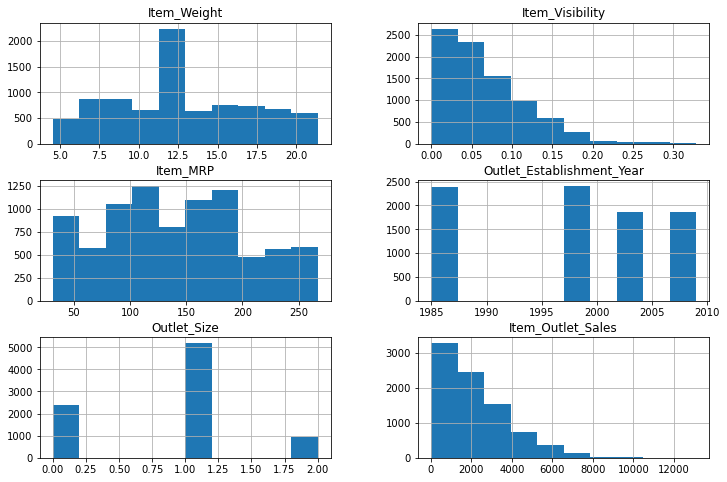

In [97]:
train.hist(figsize=(12,8))

In [91]:
## Correaltion chart

corr_matrix = train.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Size                  0.086182
Item_Weight                  0.009693
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

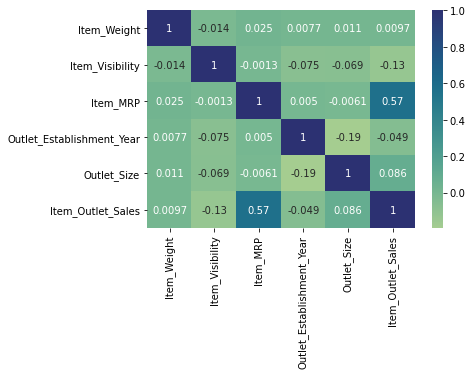

In [98]:
sns.heatmap(corr_matrix, annot=True, cmap='crest')

In [99]:
cat_var = [cname for cname in train if train[cname].dtype == 'object']
cat_test = [cname for cname in test if test[cname].dtype == 'object']

In [100]:
print("Categories in train data are")
for i in cat_var:
    col_train = train[i].unique()
    print(i,col_train)

Categories in train data are
Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [103]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[:2])
train['Item_Type_Combined']= train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

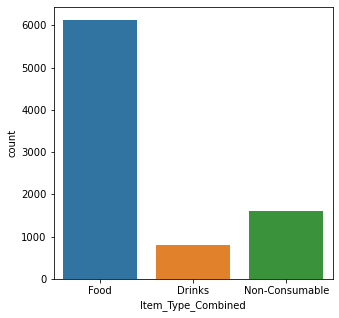

In [127]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Type_Combined', data=train)
plt.show()

In [105]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.0,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage:

In [104]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[:2])
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':"Non_consumable",'DR':"Drinks"})
test['Item_Type_Combined'].value_counts()

Food              4076
Non_consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [107]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1.0,Tier 1,Supermarket Type1,Food
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,1.0,Tier 2,Supermarket Type1,Food
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,1.0,Tier 3,Grocery Store,Non_consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,1.0,Tier 2,Supermarket Type1,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,1.0,Tier 3,Supermarket Type3,Food


## RUNNING THE MODEL

In [108]:
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_MRP', 'Outlet_Identifier',
            'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type','Item_Type_Combined']
label = ['Item_Outlet_Sales']
x=train[features]
y=train[label]
test_model = test[features]

In [111]:
x.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,9.30,Low Fat,0.016047,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,Food
1,5.92,Regular,0.019278,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,Drinks
2,17.50,Low Fat,0.016760,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,Food
3,19.20,Regular,0.000000,182.0950,OUT010,1998,1.0,Tier 3,Grocery Store,Food
4,8.93,Low Fat,0.000000,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,Non-Consumable


In [112]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,test_size=0.2)

In [114]:
object_cols = [cname for cname in x if x[cname].dtype == 'object']
num_X_train = [cname for cname in x if x[cname].dtype in ['int64','float']]

## One hot encoding
**Converting categorical data into numerical values**

In [115]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
OH_X_train_1 = pd.DataFrame(ohe.fit_transform(x_train[object_cols]))
OH_X_valid_1 = pd.DataFrame(ohe.transform(x_test[object_cols])) 
OH_X_train_1.index = x_train[object_cols].index
OH_X_valid_1.index = x_test[object_cols].index
num_X_train = x_train.drop(object_cols,axis =1)
num_X_valid = x_test.drop(object_cols,axis =1)
oh_x_train = pd.concat([num_X_train, OH_X_train_1], axis=1)
oh_x_valid = pd.concat([num_X_valid, OH_X_valid_1],axis=1)
# On Test Data
test_model_oh = pd.DataFrame(ohe.transform(test_model[object_cols]))
test_model_oh.index = test_model[object_cols].index
num_X_test = test_model.drop(object_cols,axis =1)
test_final = pd.concat([num_X_test, test_model_oh], axis=1)

In [116]:
model1 = RandomForestRegressor(n_estimators=100, random_state=0)
model1.fit(oh_x_train, y_train)
pred_rf = model1.predict(oh_x_valid)
rand_for = mean_squared_error(y_test, pred_rf,squared=False)
print(rand_for)
pred1 = model1.predict(test_final)

<ipython-input-116-69bc51dd1d7b>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



1163.1062326753693


In [117]:
model2 = LinearRegression()
model2.fit(oh_x_train,y_train)
pred_lin = model2.predict(oh_x_valid)
lin_reg = mean_squared_error(y_test, pred_lin,squared=False)
print(lin_reg)
pred2 = model2.predict(test_final)
pred2 = pred2.reshape(-1)

1141.0984786229315


In [121]:
model3 = DecisionTreeRegressor()
model3.fit(oh_x_train,y_train)
pred_dec = model3.predict(oh_x_valid)
dec_tree = mean_squared_error(y_test,pred_dec,squared=False)
print(dec_tree)
pred_test_dec = model3.predict(test_final)
pred_test_dec = pred_test_dec.reshape(-1)

1546.4155321278872


In [122]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_r.fit(oh_x_train,y_train)
pred_xgb = xgb_r.predict(oh_x_valid)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, pred_xgb))
print("RMSE : % f" %(rmse_xgboost))
xbg_test = xgb_r.predict(test_final)
xbg_test = xbg_test.reshape(-1)

[21:53:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1105.113988


In [125]:
result = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','XGBoost','DECISION TREE'],
                       'Score' : [lin_reg,rand_for,rmse_xgboost,dec_tree]})
result_df = result.sort_values(by='Score',ascending=True)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
1105.113988,XGBoost
1141.098479,LINEAR REGRESSION
1163.106233,RANDOM FOREST
1546.415532,DECISION TREE


In [129]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)